In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from collections import defaultdict

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/NNMethodsProject/ruatd-2022-bi/train.csv')
df_val = pd.read_csv('/content/drive/MyDrive/NNMethodsProject/ruatd-2022-bi/val.csv')
df_test = pd.read_csv('/content/drive/MyDrive/NNMethodsProject/ruatd-2022-bi/test.csv')

In [ ]:
df_train.columns = ['id', 'input', 'label']
# df_train = df_train[['input', 'label']]
# df_train['label'].replace({'H': 1, 'M': 0}, inplace=True)
# df_train.head()

In [ ]:
df_val.columns = ['id', 'input', 'label']
df_val = df_val[['input', 'label']]
# df_val['label'].replace({'H': 1, 'M': 0}, inplace=True)

df_test.columns = ['id', 'input']
df_test = df_test[['input']]

In [ ]:
sns.set(style='whitegrid', palette='muted', font_scale=1.2)
HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]
sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Class distribution in train data')

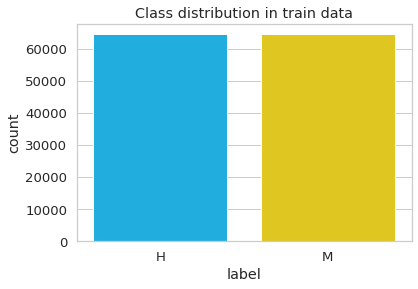

In [ ]:
sns.countplot(df_train['label'])
plt.title('Class distribution in train data')

In [ ]:
df_train['label'].value_counts()

1    64535
0    64531
Name: label, dtype: int64

In [ ]:
df_train['text_len'] = df_train['input'].apply(lambda x: len(x))

In [ ]:
df_train['text_len'].max()

3560

In [ ]:
df_train[df_train['label'] == 'H']['text_len'].max()

2963

In [ ]:
df_train[df_train['label'] == 'H']['text_len'].mean()

221.472022933292

In [ ]:
df_train[df_train['label'] == 'M']['text_len'].max()

3560

In [ ]:
df_train[df_train['label'] == 'M']['text_len'].mean()

236.86135345802793

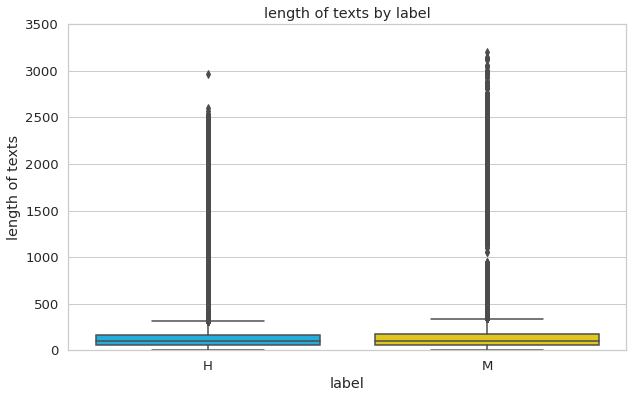

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="text_len", data=df_train)
plt.ylim((0, 3500))
plt.title('length of texts by label')
plt.ylabel('length of texts')
plt.xlabel('label');

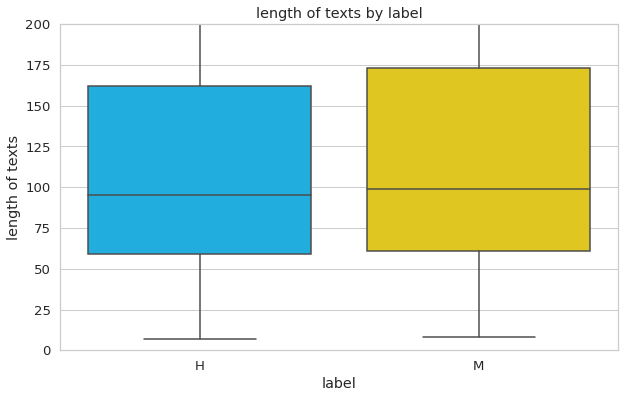

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="text_len", data=df_train)
plt.ylim((0, 200))
plt.title('length of texts by label')
plt.ylabel('length of texts')
plt.xlabel('label');

In [ ]:
df_train['tok_num'] = df_train['input'].apply(lambda x: len(x.split()))

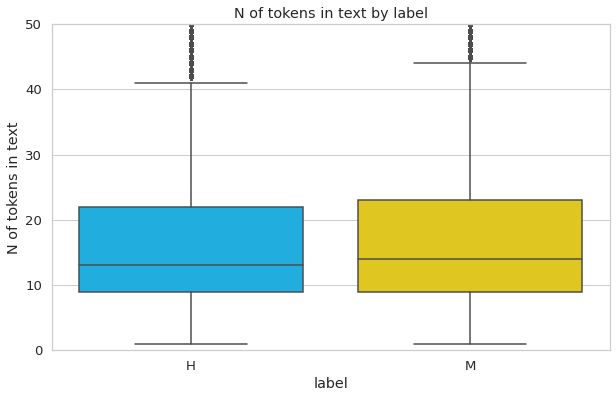

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="tok_num", data=df_train)
plt.ylim((0, 50))
plt.title('N of tokens in text by label')
plt.ylabel('N of tokens in text')
plt.xlabel('label');

In [ ]:
def tokens_length(text):
  text = text.split()
  return int(np.asarray([len(t) for t in text]).mean())

In [ ]:
df_train['tok_len'] = df_train['input'].apply(lambda x: tokens_length(x))

In [ ]:
df_train[df_train['tok_len'] == 106]

,id,input,label,text_len,tok_len
64899,108146,дети:_________________________________________...,H,106,106


In [ ]:
df_train['tok_len'].max()

106

In [ ]:
df_train[df_train['label'] == 'H']['tok_len'].max()

106

In [ ]:
df_train[df_train['label'] == 'H']['tok_len'].mean()

5.8106608816921055

In [ ]:
df_train[df_train['label'] == 'M']['tok_len'].max()

55

In [ ]:
df_train[df_train['label'] == 'M']['tok_len'].mean()

5.684523717283167

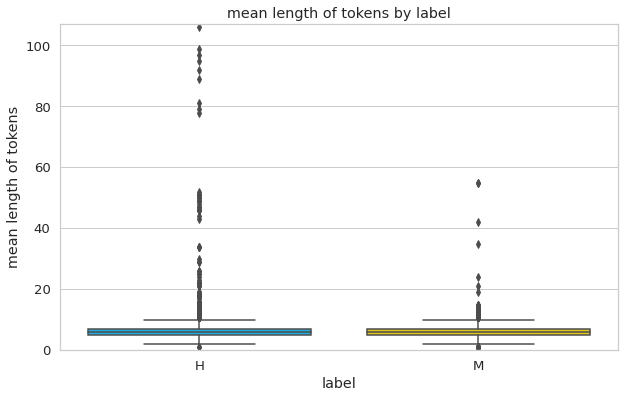

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="tok_len", data=df_train)
plt.ylim((0, 107))
plt.title('mean length of tokens by label')
plt.ylabel('mean length of tokens')
plt.xlabel('label');

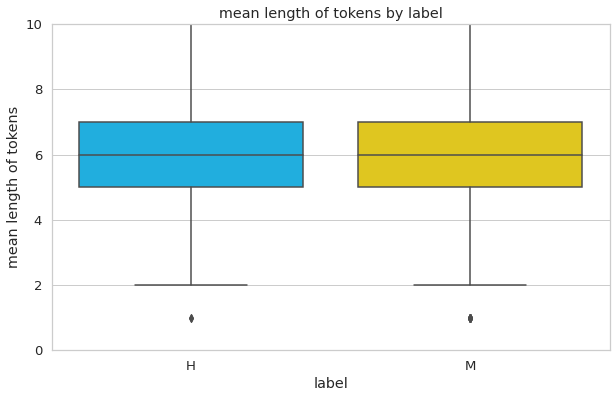

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="tok_len", data=df_train)
plt.ylim((0, 10))
plt.title('mean length of tokens by label')
plt.ylabel('mean length of tokens')
plt.xlabel('label');

In [ ]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('russian'))
def num_stops(text):
  ans = 0
  for token in text.split():
    if token in stop_words:
      ans += 1
  return ans

In [ ]:
df_train['num_stops'] = df_train['input'].apply(lambda x: num_stops(x))
print(df_train[df_train['label'] =='H']['num_stops'].mean())
print(df_train[df_train['label'] =='M']['num_stops'].mean())

6.349500271170682
6.645317754257643


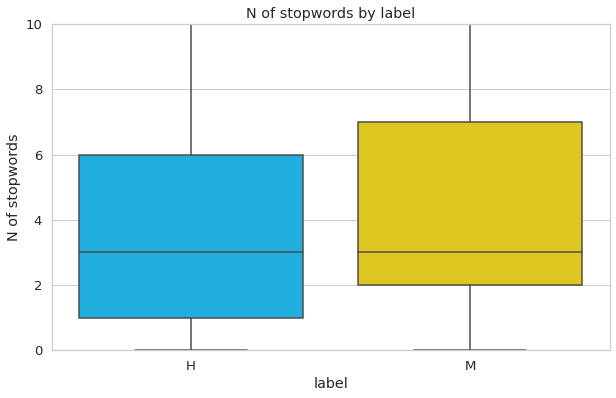

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="num_stops", data=df_train)
plt.ylim((0, 10))
plt.title('N of stopwords by label')
plt.ylabel('N of stopwords')
plt.xlabel('label');

In [ ]:
def num_unique(text):
  return len(set(text.split()))

In [ ]:
df_train['num_unique'] = df_train['input'].apply(lambda x: num_unique(x))
print(df_train[df_train['label'] =='H']['num_unique'].mean())
print(df_train[df_train['label'] =='M']['num_unique'].mean())

25.89436739753622
31.32514605383459


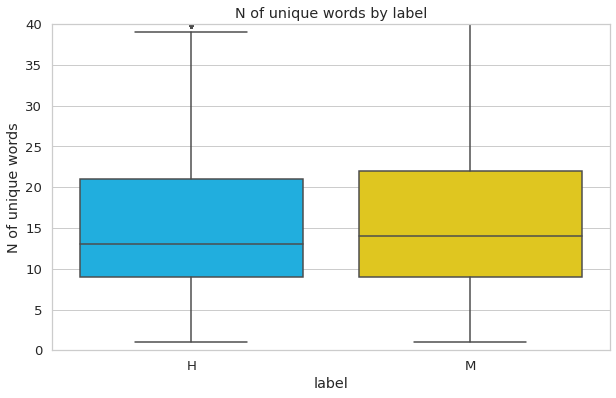

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="label", y="num_unique", data=df_train)
plt.ylim((0, 40))
plt.title('N of unique words by label')
plt.ylabel('N of unique words')
plt.xlabel('label');

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
new_df_train, _ = train_test_split(df_train, test_size=0.4, random_state=10, shuffle=True, stratify=df_train['label'])
new_df_train['label'].value_counts()

1    38721
0    38718
Name: label, dtype: int64

In [ ]:
new_df_val, _ = train_test_split(df_val, test_size=0.4, random_state=10, shuffle=True, stratify=df_val['label'])
new_df_val['label'].value_counts()

1    6453
0    6453
Name: label, dtype: int64